In [1]:
from __future__ import print_function
import gzip
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import struct
import sys

try: 
    from urllib.request import urlretrieve 
except ImportError: 
    from urllib import urlretrieve

# Config matplotlib for inline plotting
%matplotlib inline

In [2]:
#function to take URL and download zip/gz data, uncompress the data and then use the digit as structured image array
#<Image_Array> and <Label_Array> will have mapping of images with label

def loadData(src, cimg):
    print ('Downloading ' + src)
    gzfname, h = urlretrieve(src, './delete.me')
    print ('Done.')
    try:
        with gzip.open(gzfname) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x3080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))[0]
            if n != cimg:
                raise Exception('Invalid file: expected {0} entries.'.format(cimg))
            crow = struct.unpack('>I', gz.read(4))[0]
            ccol = struct.unpack('>I', gz.read(4))[0]
            if crow != 28 or ccol != 28:
                raise Exception('Invalid file: expected 28 rows/cols per image.')
            # Read data.
            res = np.fromstring(gz.read(cimg * crow * ccol), dtype = np.uint8)
    finally:
        os.remove(gzfname)
    return res.reshape((cimg, crow * ccol))

In [3]:
def loadLabels(src, cimg):
    print ('Downloading ' + src)
    gzfname, h = urlretrieve(src, './delete.me')
    print ('Done.')
    try:
        with gzip.open(gzfname) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x1080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))
            if n[0] != cimg:
                raise Exception('Invalid file: expected {0} rows.'.format(cimg))
            # Read labels.
            res = np.fromstring(gz.read(cimg), dtype = np.uint8)
    finally:
        os.remove(gzfname)
    return res.reshape((cimg, 1))

def try_download(dataSrc, labelsSrc, cimg):
    data = loadData(dataSrc, cimg)
    labels = loadLabels(labelsSrc, cimg)
    return np.hstack((data, labels))

In [4]:
# URLs for the train image and labels data
url_train_image = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
url_train_labels = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
num_train_samples = 60000

print("Getting train data....")
train = try_download(url_train_image, url_train_labels, num_train_samples)


url_test_image = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
url_test_labels = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
num_test_samples = 10000

print("Gettings test data")
test = try_download(url_test_image, url_test_labels, num_test_samples)

Done.
Done.
Done.
Done.


Image Label:  7


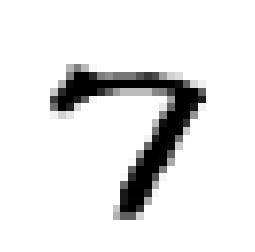

In [5]:
# display a test image
sample_number = 6001
sample_number = 7001
plt.imshow(train[sample_number,:-1].reshape(28,28), cmap="gray_r")
plt.axis('off')
print("Image Label: ", train[sample_number,-1])
plt.show()

In [6]:
X =  np.array(train)

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4],
       ..., 
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 6],
       [0, 0, 0, ..., 0, 0, 8]], dtype=uint8)

(1797, 64)


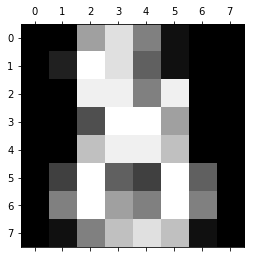

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
#the data set containes 1797 total images
#[0]- All possible Zeros
#[1] - All possible ones
#Print the last item in the array dataset.
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1796]) 
plt.show() 
#matrix shows the image as the pixel intensity in a pixel matrix of 8x8 array.

Total records:
(1797, 64)
Features(matrix) that can be used to classify the digits samples:
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
The number corresponding to each digit image that we are trying to learn:
[0 1 2 ..., 8 9 8]
Image data in 2D array in 8x8 matrix:
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
Actual Image:


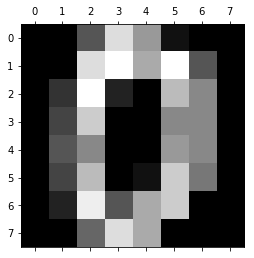

In [106]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()
print('Total records:')
print(digits.data.shape)
#total 1796 records
print('Features(matrix) that can be used to classify the digits samples:')
print(digits.data)
#the features that can be used to classify the digits samples
print('The number corresponding to each digit image that we are trying to learn:')
print(digits.target)
#the number corresponding to each digit image that we are trying to learn
print('Image data in 2D array in 8x8 matrix:')
print(digits.images[0])
#case of the digits, each original sample is an image of shape (8, 8)
print('Actual Image:')
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

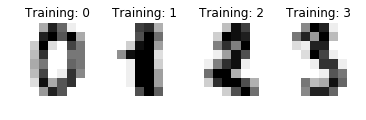

In [107]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [108]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [109]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
#fit the classifier to model, train the model
#Train using first half of the dataset.
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
# Now predict the second half of the dataset
expected = digits.target[n_samples // 2:]

In [111]:
#the task is to predict, given an image, which digit it represents
predicted = classifier.predict(data[n_samples // 2:])
#There are 10 classes 0 to 9, we need to classify each of these digits.

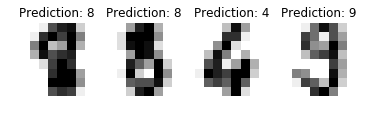

In [127]:
#display few predicted images from the second half of the dataset.

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

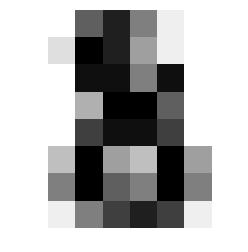

[0 1 2 ..., 0 8 9]


In [128]:
#now let us test with individual output, let take image in index 2
plt.imshow(digits.data[-1:].reshape(8,8), cmap="gray_r")
plt.axis('off')
plt.show()
#from the target indexs, picks one digit
print(digits.target[:-1])

In [113]:
predictedone = classifier.predict(digits.data[-1:])

In [114]:
#print the predicted value.
print(predictedone)

[8]


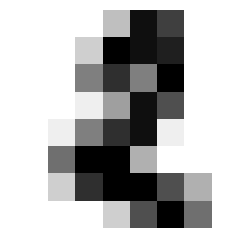

2


In [21]:
#now let us test with individual output, let take image in index 2
plt.imshow(digits.data[2].reshape(8,8), cmap="gray_r")
plt.axis('off')
plt.show()
#from the target indexs, picks one digit
print(digits.target[2])
predictedtwo = classifier.predict(digits.data[2].reshape(1,-1))

In [130]:
#print the predicted value
print(predictedtwo)

[2]
